In [35]:
#1
import sympy as sp

def resh_urav(p, q):
    x = sp.symbols('x')
    urav = x ** 2 + p * x + q
    resh = sp.solve(urav, x)

    if not resh:
        return "Корней нет"

    return min(resh)

def resh_task(n, p, q):
    x = resh_urav(p, q)
    sum_ = 0

    rad = sp.pi / 180

    for k in range(n + 1):
        deg = x + k * 40
        sum_ += sp.cos(deg * rad)

    return sum_.evalf()

n = int(input('natural >>> '))
p = int(input('natural >>> '))
q = int(input('natural >>> '))

result = resh_task(n, p, q)
print('Res = ', result)

natural >>>  2
natural >>>  -5
natural >>>  6


Res =  1.88170875345656


natural >>>  2
natural >>>  1
natural >>>  1
natural >>>  0
natural >>>  -1



Точки пересечения:

x = 0, y = -1.00000000000000
x = 1.76929235423863, y = 2.13039543476728


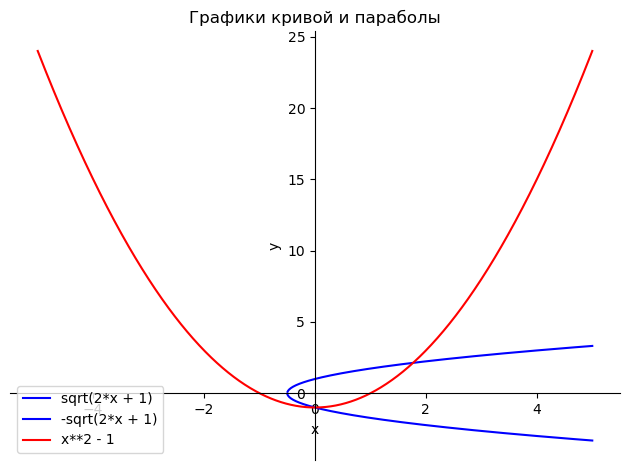

In [47]:
#2
def resh_task2(k, m, a, b, c):
    x, y = sp.symbols('x y')
    
    graph1 = y**2 - k*x - m
    graph2 = y - a*x**2 - b*x - c
    
    resh = sp.solve([graph1, graph2], (x, y))
    real_resh = [(res[0], res[1]) for res in resh if res[0].is_real and res[1].is_real]
    
    if not real_resh:
        print("\nКривая и парабола не пересекаются.")
    else:
        print("\nТочки пересечения:")
        for point in real_resh:
            print(f"x = {point[0].evalf()}, y = {point[1].evalf()}")
        
        p = sp.plotting.plot(
            sp.sqrt(k*x + m),       
            -sp.sqrt(k*x + m),      
            a*x**2 + b*x + c,       
            (x, -5, 5),             
            title="Графики кривой и параболы",
            xlabel="x", ylabel="y",
            legend=True,
            show=False
        )
        p[0].line_color = 'blue'    
        p[1].line_color = 'blue'    
        p[2].line_color = 'red'     
        p.show()

k = int(input('natural >>> '))
m = int(input('natural >>> '))
a = int(input('natural >>> '))
b = int(input('natural >>> '))
c = int(input('natural >>> '))

resh_task2(k, m, a, b, c)

Действительная часть u(x, y):

 ⎛   ⎛   2        3⎞       ⎛    ⎛ 2      2⎞⎞⎞ 
 ⎜sin⎝6⋅x ⋅y - 2⋅y ⎠   sinh⎝2⋅x⋅⎝x  - 3⋅y ⎠⎠⎟ 
-⎜────────────────── - ─────────────────────⎟ 
 ⎝        2                      2          ⎠ 
──────────────────────────────────────────────
      2⎛   2      3⎞       2⎛  ⎛ 2      2⎞⎞   
   cos ⎝3⋅x ⋅y - y ⎠ + sinh ⎝x⋅⎝x  - 3⋅y ⎠⎠   
----------------------------------

Мнимая часть v(x, y):
    ⎛   2        3⎞       ⎛    ⎛ 2      2⎞⎞ 
 sin⎝6⋅x ⋅y - 2⋅y ⎠ + sinh⎝2⋅x⋅⎝x  - 3⋅y ⎠⎠ 
────────────────────────────────────────────
  ⎛   2⎛   2      3⎞       2⎛  ⎛ 2      2⎞⎞⎞
2⋅⎝cos ⎝3⋅x ⋅y - y ⎠ + sinh ⎝x⋅⎝x  - 3⋅y ⎠⎠⎠


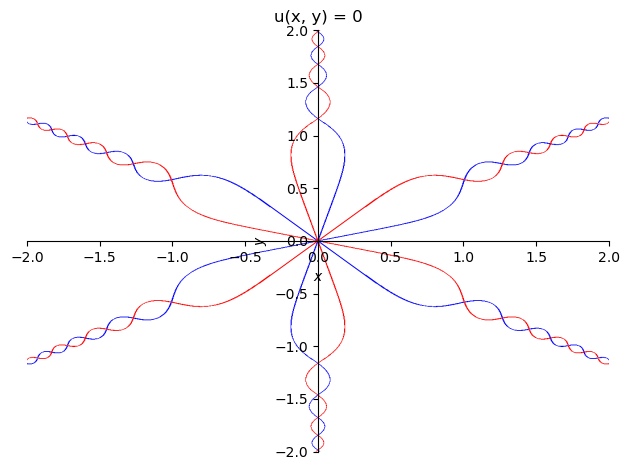

In [31]:
#3
x, y = sp.symbols('x y', real=True)
z = x + sp.I * y
f = (1 + sp.I) * sp.tanh(z**3)

u = sp.re(f)
v = sp.im(f)

u_ = sp.simplify(u)
v_ = sp.simplify(v)

print("Действительная часть u(x, y):\n")
sp.pprint(u_)
print('----------------------------------')
print("\nМнимая часть v(x, y):")
sp.pprint(v_)

p_u = sp.plot_implicit(sp.Eq(u_, 0), (x, -2, 2), (y, -2, 2),
                      title='u(x, y) = 0', line_color='blue', show=False)
p_v = sp.plot_implicit(sp.Eq(v_, 0), (x, -2, 2), (y, -2, 2),
                      title='v(x, y) = 0', line_color='red', show=False)

p_u.append(p_v[0])
p_u.show()